# Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical,plot_model
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

# Load Data

In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')

Shape of X_train : (50000, 32, 32, 3)
Shape of X_test : (10000, 32, 32, 3)


In [ ]:
print(y_train.shape, '\n', y_train)

(50000, 1) 
 [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [ ]:
y_train[0]

array([6], dtype=uint8)

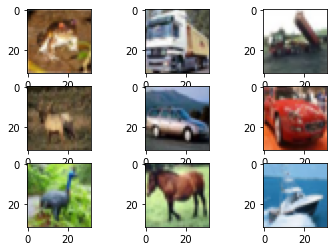

In [ ]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_train[i])

In [ ]:
# 0 --> 255.
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
# Rescale Input
X_train = X_train/255
X_test  = X_test/255

In [ ]:
# to_categorical
# do dummy for values
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
mean = X_train.mean(axis=0)
std  = X_train.std(axis=0)

def preprocess_data(data_set):
    # preprocess_data
    return data_set

# X_train = preprocess_data(X_train)
# X_test  = preprocess_data(X_test)

In [ ]:
X_train.max(), X_train.min()

(1.0, 0.0)

In [ ]:
# Hyperparameters
BATCH_SIZE  = 50
NUM_CLASSES = 10
EPOCHS      = 32

# Assignment 01
- Design your own `deep NN` to classify the `CIFAR 10` images (you can download from keras.dataset) into one of the 10 classes
- Investigate the use of different architectures (`different layers`, `learning rate`, `optimizers`, `loss function`)
- Note you will need to `flatten` the image and use it as your input vector

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train.shape[1:] # 32 x 32 x 3  --> 3072

(32, 32, 3)

In [ ]:
2**8

256

In [ ]:
model_1 = Sequential()
model_1.add(Flatten(input_shape=(X_train.shape[1:])))

model_1.add(BatchNormalization())
model_1.add(Dense(units=256, activation='relu'))
model_1.add(Dropout(0.2))

model_1.add(BatchNormalization())
model_1.add(Dense(units=128, activation='relu'))
model_1.add(Dropout(0.2))


model_1.add(BatchNormalization())
model_1.add(Dense(units=64, activation='relu'))
model_1.add(Dropout(0.2))

model_1.add(BatchNormalization())
model_1.add(Dense(units=NUM_CLASSES, activation='softmax'))
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 3072)              0         
                                                                 
 batch_normalization_7 (Batc  (None, 3072)             12288     
 hNormalization)                                                 
                                                                 
 dense_40 (Dense)            (None, 256)               786688    
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 batch_normalization_8 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_41 (Dense)            (None, 128)             

In [ ]:
# Adamax - Dense - Dropout.

In [ ]:
model_1.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.004, epsilon=1e-07),
                            loss=tf.keras.losses.BinaryCrossentropy(),
                            metrics=['accuracy'],
)

In [ ]:
history_1 = model_1.fit(
            x=X_train, y=y_train, 
            batch_size=BATCH_SIZE, 
            epochs=EPOCHS,
            validation_split=0.1,
)

Epoch 1/32
900/900 [==============================] - 5s 5ms/step - loss: 0.3082 - accuracy: 0.3165 - val_loss: 0.2467 - val_accuracy: 0.4204
Epoch 2/32
900/900 [==============================] - 4s 5ms/step - loss: 0.2530 - accuracy: 0.4059 - val_loss: 0.2313 - val_accuracy: 0.4568
Epoch 3/32
900/900 [==============================] - 4s 5ms/step - loss: 0.2405 - accuracy: 0.4427 - val_loss: 0.2219 - val_accuracy: 0.4832
Epoch 4/32
900/900 [==============================] - 4s 5ms/step - loss: 0.2325 - accuracy: 0.4643 - val_loss: 0.2162 - val_accuracy: 0.5048
Epoch 5/32
900/900 [==============================] - 4s 5ms/step - loss: 0.2261 - accuracy: 0.4813 - val_loss: 0.2141 - val_accuracy: 0.5080
Epoch 6/32
900/900 [==============================] - 4s 5ms/step - loss: 0.2209 - accuracy: 0.4959 - val_loss: 0.2072 - val_accuracy: 0.5334
Epoch 7/32
900/900 [==============================] - 4s 5ms/step - loss: 0.2169 - accuracy: 0.5075 - val_loss: 0.2052 - val_accuracy: 0.5390
Epoch 

In [ ]:
model_1.metrics_names

['loss', 'accuracy']

In [ ]:
print(model_1.evaluate(X_train, y_train))
print(model_1.evaluate(X_test, y_test))

1563/1563 [==============================] - 5s 3ms/step - loss: 0.1340 - accuracy: 0.7316
[0.13395656645298004, 0.7315599918365479]
313/313 [==============================] - 1s 3ms/step - loss: 0.1945 - accuracy: 0.5625
[0.19454196095466614, 0.5625]


In [ ]:
history_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

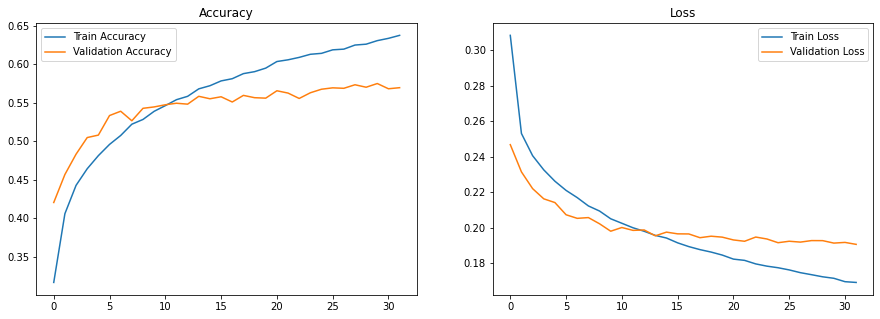

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(history_1.history['accuracy'], label='Train Accuracy')
ax[0].plot(history_1.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Accuracy')
ax[0].legend()

ax[1].plot(history_1.history['loss'], label='Train Loss')
ax[1].plot(history_1.history['val_loss'], label='Validation Loss')
ax[1].set_title('Loss')
ax[1].legend()
plt.show()

# Assignment 02
- Design your `deep convolutional neural network` ( to classify the `CIFAR 10` images into one of the 10 classes
- Invistage the use of different architectures (different `layers`, `kernel sizes`, `pooling`, `learning rate`, `optimizers`, `loss function`)

You have to specify filters and kernel_size. These parameters have no default.

Default padding is valid, which means no zero-padding, and the default strides is (1,1).

# (N - F + 2P)/S   +  1

# P =  (F - 1) / 2

In [ ]:
X_train.shape[1:]

(32, 32, 3)

In [ ]:
model_2=Sequential()

model_2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape = X_train.shape[1:]))
model_2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))

model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model_2.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same' ))

model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same' ))
model_2.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same' ))

model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))


model_2.add(Flatten())

model_2.add(Dense(512, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Dense(256, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.4))

model_2.add(Dense(64, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.3))

model_2.add(Dense(NUM_CLASSES, activation = "softmax"))

# Conv2D, MaxPooling2D, Dropout, Adamax

In [ ]:
model_2.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001, epsilon=1e-07),
                            loss=tf.keras.losses.BinaryCrossentropy(),
                            metrics=['accuracy'],
                
)

In [ ]:
# Data augmentation to prevent overfitting
# datagen = ImageDataGenerator(
#         rotation_range=10,  
#         zoom_range = 0.1, 
#         width_shift_range=0.1,  
#         height_shift_range=0.1,  
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)  # randomly flip images

# datagen.fit(X_train)

In [ ]:
history_2 = model_2.fit(
            x=X_train, y=y_train, 
            batch_size=BATCH_SIZE, 
            epochs=EPOCHS,
            validation_data= (X_test, y_test),
            validation_split=0.1,
)

Epoch 1/32
900/900 [==============================] - 10s 9ms/step - loss: 0.4456 - accuracy: 0.2231 - val_loss: 0.2887 - val_accuracy: 0.2872
Epoch 2/32
900/900 [==============================] - 8s 9ms/step - loss: 0.2656 - accuracy: 0.3754 - val_loss: 0.2342 - val_accuracy: 0.4400
Epoch 3/32
900/900 [==============================] - 8s 9ms/step - loss: 0.2263 - accuracy: 0.4863 - val_loss: 0.1867 - val_accuracy: 0.5754
Epoch 4/32
900/900 [==============================] - 8s 9ms/step - loss: 0.1957 - accuracy: 0.5756 - val_loss: 0.1619 - val_accuracy: 0.6456
Epoch 5/32
900/900 [==============================] - 8s 9ms/step - loss: 0.1735 - accuracy: 0.6335 - val_loss: 0.1538 - val_accuracy: 0.6688
Epoch 6/32
900/900 [==============================] - 8s 9ms/step - loss: 0.1559 - accuracy: 0.6793 - val_loss: 0.1412 - val_accuracy: 0.6968
Epoch 7/32
900/900 [==============================] - 8s 9ms/step - loss: 0.1445 - accuracy: 0.7070 - val_loss: 0.1308 - val_accuracy: 0.7208
Epoch

In [ ]:
model_2.metrics_names

['loss', 'accuracy']

In [ ]:
history_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
print(model_2.evaluate(X_train, y_train))
print(model_2.evaluate(X_test, y_test))

1563/1563 [==============================] - 7s 4ms/step - loss: 0.0305 - accuracy: 0.9470
[0.030549917370080948, 0.9470199942588806]
313/313 [==============================] - 1s 4ms/step - loss: 0.0909 - accuracy: 0.8359
[0.09088446199893951, 0.8359000086784363]


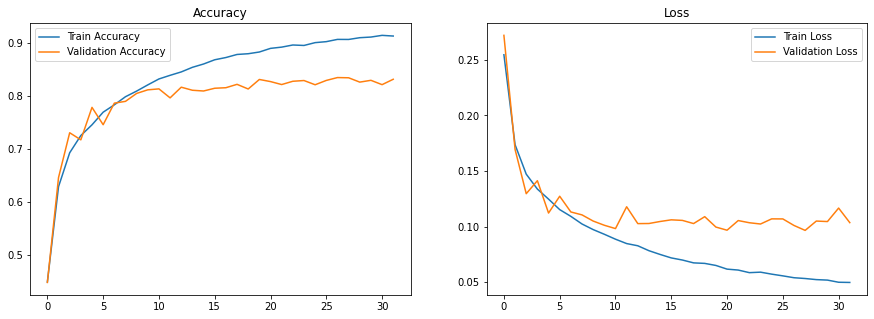

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(history_2.history['accuracy'], label='Train Accuracy')
ax[0].plot(history_2.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Accuracy')
ax[0].legend()

ax[1].plot(history_2.history['loss'], label='Train Loss')
ax[1].plot(history_2.history['val_loss'], label='Validation Loss')
ax[1].set_title('Loss')
ax[1].legend()
plt.show()


 
<hr style='color:red; background-color:yellow; width:2px; height:10px'>





# Assignment 03
- Repeat Assignment 1 and 2 using MNIST dataset
- Note that you will need to convert the training labels into categorical using one hot encoding using `to_categorical()` function

# Load Data

In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')

Shape of X_train : (60000, 28, 28)
Shape of X_test : (10000, 28, 28)


In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# OR use 'sparse_categorical_crossentropy' in the [LOSS Function]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_train.shape

(60000, 10)

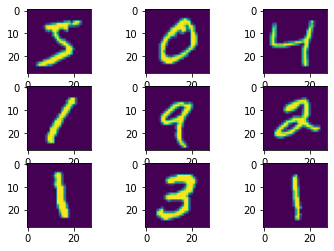

In [ ]:
# plot first few images
for i in range(9):
  plt.subplot(3,3, i+1)
  plt.imshow(X_train[i])


In [ ]:
# Rescale the Input
X_train = X_train/255
X_test  = X_test/255

In [ ]:
X_train.max(), X_train.min()

(1.0, 0.0)

In [ ]:
# Hyperparameters
BATCH_SIZE  = 2**6  #64
NUM_CLASSES = 10
EPOCHS      = 50

---
### $$ ANN $$
---

In [ ]:
model_3 = Sequential()
model_3.add(Flatten(input_shape=(X_train.shape[1:])))

model_3.add(BatchNormalization())
model_3.add(Dense(units=256, activation='relu'))
model_3.add(Dropout(0.2))

model_3.add(BatchNormalization())
model_3.add(Dense(units=128, activation='relu'))
model_3.add(Dropout(0.2))


model_3.add(BatchNormalization())
model_3.add(Dense(units=64, activation='relu'))
model_3.add(Dropout(0.2))

model_3.add(BatchNormalization())
model_3.add(Dense(units=NUM_CLASSES, activation='softmax'))
model_3.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_48 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_48 (Dense)            (None, 256)               200960    
                                                                 
 dropout_65 (Dropout)        (None, 256)               0         
                                                                 
 batch_normalization_49 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_49 (Dense)            (None, 128)             

In [ ]:
model_3.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.009, epsilon=1e-07),
                            loss=tf.keras.losses.CategoricalCrossentropy(),
                            metrics=['accuracy'],
)

In [ ]:
history_3 = model_3.fit(
            x=X_train, y=y_train, 
            batch_size=BATCH_SIZE, 
            epochs=EPOCHS,
            validation_split=0.1,
)

Epoch 1/50
844/844 [==============================] - 6s 6ms/step - loss: 0.3211 - accuracy: 0.9035 - val_loss: 0.1035 - val_accuracy: 0.9687
Epoch 2/50
844/844 [==============================] - 5s 6ms/step - loss: 0.1735 - accuracy: 0.9486 - val_loss: 0.0870 - val_accuracy: 0.9745
Epoch 3/50
844/844 [==============================] - 5s 6ms/step - loss: 0.1413 - accuracy: 0.9585 - val_loss: 0.0793 - val_accuracy: 0.9775
Epoch 4/50
844/844 [==============================] - 5s 6ms/step - loss: 0.1139 - accuracy: 0.9661 - val_loss: 0.0716 - val_accuracy: 0.9800
Epoch 5/50
844/844 [==============================] - 5s 6ms/step - loss: 0.1030 - accuracy: 0.9694 - val_loss: 0.0681 - val_accuracy: 0.9813
Epoch 6/50
844/844 [==============================] - 5s 6ms/step - loss: 0.0889 - accuracy: 0.9727 - val_loss: 0.0622 - val_accuracy: 0.9842
Epoch 7/50
844/844 [==============================] - 5s 6ms/step - loss: 0.0801 - accuracy: 0.9754 - val_loss: 0.0620 - val_accuracy: 0.9838
Epoch 

In [ ]:
model_3.metrics_names

['loss', 'accuracy']

In [ ]:
print(model_3.evaluate(X_train, y_train),'\nAccuracy for training: ', round(history_3.history['accuracy'][-1]*100, 4))
print(model_3.evaluate(X_test, y_test), '\nAccuracy for testing : ', round(history_3.history['val_accuracy'][-1]*100, 4))

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0083 - accuracy: 0.9983
[0.008349715732038021, 0.9982666373252869]
313/313 [==============================] - 1s 2ms/step - loss: 0.0723 - accuracy: 0.9840
[0.07232467085123062, 0.984000027179718]


In [ ]:
history_3.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

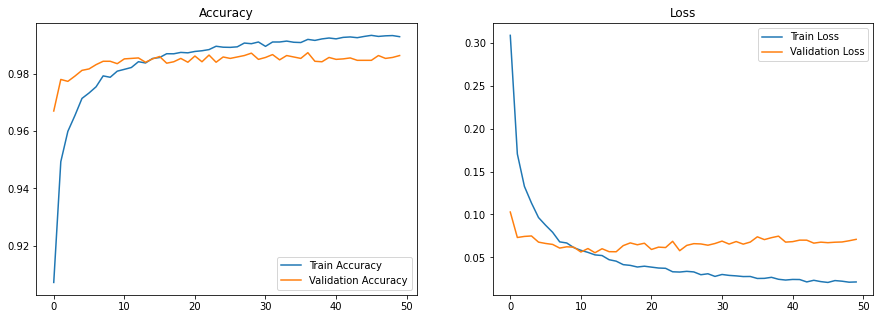

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(history_3.history['accuracy'], label='Train Accuracy')
ax[0].plot(history_3.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Accuracy')
ax[0].legend()

ax[1].plot(history_3.history['loss'], label='Train Loss')
ax[1].plot(history_3.history['val_loss'], label='Validation Loss')
ax[1].set_title('Loss')
ax[1].legend()
plt.show()

---
## $$ CNN $$
---

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# reshape 
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [ ]:
model_4=Sequential()

model_4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape = X_train.shape[1:]))
model_4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))

model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

model_4.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model_4.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same' ))

model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.3))

model_4.add(Conv2D(128, kernel_size=(3, 3), activation='relu',))
model_4.add(Conv2D(128, kernel_size=(3, 3), activation='relu',))

model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))


model_4.add(Flatten())

model_4.add(Dense(512, activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.5))

model_4.add(Dense(256, activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.4))

model_4.add(Dense(64, activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.3))

model_4.add(Dense(NUM_CLASSES, activation = "softmax"))

# Conv2D, MaxPooling2D, Dropout, Adamax

In [ ]:
model_4.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001, epsilon=1e-07),
                            loss=tf.keras.losses.CategoricalCrossentropy(),
                            metrics=['accuracy'],
)

In [ ]:
history_4 = model_4.fit(
            x=X_train, y=y_train, 
            batch_size=BATCH_SIZE, 
            epochs=EPOCHS,
            validation_split=0.1,
)

Epoch 1/50
844/844 [==============================] - 10s 11ms/step - loss: 0.7948 - accuracy: 0.7518 - val_loss: 0.0920 - val_accuracy: 0.9707
Epoch 2/50
844/844 [==============================] - 8s 10ms/step - loss: 0.1919 - accuracy: 0.9468 - val_loss: 0.0508 - val_accuracy: 0.9852
Epoch 3/50
844/844 [==============================] - 8s 10ms/step - loss: 0.1232 - accuracy: 0.9661 - val_loss: 0.0349 - val_accuracy: 0.9887
Epoch 4/50
844/844 [==============================] - 8s 10ms/step - loss: 0.0881 - accuracy: 0.9756 - val_loss: 0.0438 - val_accuracy: 0.9890
Epoch 5/50
844/844 [==============================] - 8s 10ms/step - loss: 0.0708 - accuracy: 0.9808 - val_loss: 0.0368 - val_accuracy: 0.9907
Epoch 6/50
844/844 [==============================] - 9s 10ms/step - loss: 0.0619 - accuracy: 0.9827 - val_loss: 0.0313 - val_accuracy: 0.9913
Epoch 7/50
844/844 [==============================] - 8s 10ms/step - loss: 0.0553 - accuracy: 0.9849 - val_loss: 0.0278 - val_accuracy: 0.992

In [ ]:
model_4.metrics_names

['loss', 'accuracy']

In [ ]:
history_4.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
print('Accuracy for training : ', round(model_4.evaluate(X_train, y_train)[1]*100, 4)) 
print('Accuracy for testing : ', round(model_4.evaluate(X_test, y_test)[1]*100, 4))

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0024 - accuracy: 0.9995
Accuracy for training :  99.9517
313/313 [==============================] - 1s 4ms/step - loss: 0.0189 - accuracy: 0.9958
Accuracy for testing :  99.58


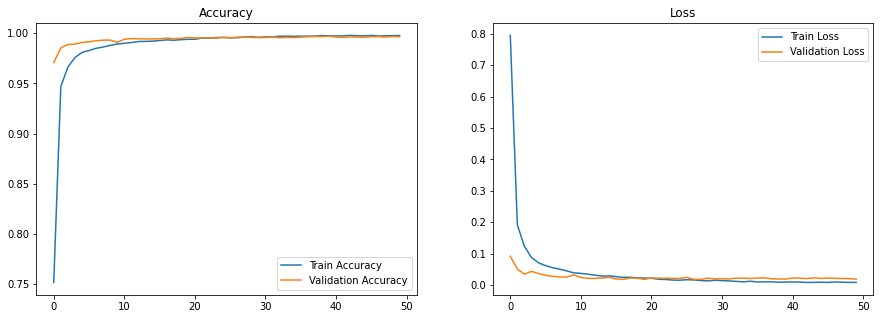

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(history_4.history['accuracy'], label='Train Accuracy')
ax[0].plot(history_4.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Accuracy')
ax[0].legend()

ax[1].plot(history_4.history['loss'], label='Train Loss')
ax[1].plot(history_4.history['val_loss'], label='Validation Loss')
ax[1].set_title('Loss')
ax[1].legend()
plt.show()